# 1. Introduction

In this study, we are analyzing the average annual daily traffic (AADT) for a section of road or highway. The goal is to understand how the predictors in the dataset influence the AADT and to develop a model that can predict traffic patterns based on these variables. The analysis involves data cleaning, exploratory data analysis, and statistical modeling to derive meaningful insights and conclusions.

# 2. Exploratory Data Analysis

In [34]:
# Import the data
aadt_raw <- read.table("aadt.txt", header = FALSE)

# Display the first few rows
head(aadt_raw)

V1,V2,V3,V4,V5,V6,V7,V8
1616,13404,2,52,2,2,5,1
1329,52314,2,60,2,2,5,1
3933,30982,2,57,2,4,5,2
3786,25207,2,64,2,4,5,2
465,20594,2,40,2,2,5,1
794,11507,2,44,2,2,5,1


In this study, we are interested in the average annual daily traffic (aadt) for a section of road or highway. We are only interested in the first five columns with the following definitions:  
* V1: Average annual daily traffic (aadt) - Response variable, y  
* V2: Population of county of which road section is located
* V3: Number of lanes of road section
* V4: Width of road section (in feet)
* V5: Two-category quality variable indicating whether or not there is control of access to road section (1 = access control; 2 = no access control)

Hence, we have the following setup:
$$ \text{aadt} = \beta_0 + \beta_1 \text{Population} + \beta_2 \text{Lanes} + \beta_3 \text{Width} + \beta_4 \text{Control}$$
* Denote no access control in with 0 instead of 2.

In [35]:
aadt <- data.frame(aadt = aadt_raw$V1, Population = aadt_raw$V2, Lanes = aadt_raw$V3, Width = aadt_raw$V4, Control = aadt_raw$V5)
aadt$Control[aadt$Control == 1] <- 0
aadt$Control[aadt$Control == 2] <- 1
head(aadt)

aadt,Population,Lanes,Width,Control
1616,13404,2,52,1
1329,52314,2,60,1
3933,30982,2,57,1
3786,25207,2,64,1
465,20594,2,40,1
794,11507,2,44,1


In [36]:
# Display the dimensions of the data
dim(aadt)

[1] 121   5

In [37]:
# Check for missing values
sum(is.na(aadt))

[1] 0

In [38]:
dim(aadt)

[1] 121   5

In [39]:
summary(aadt)

      aadt          Population         Lanes           Width      
 Min.   :   201   Min.   :  7716   Min.   :2.000   Min.   :19.00  
 1st Qu.:  1769   1st Qu.: 25717   1st Qu.:2.000   1st Qu.:24.00  
 Median :  8666   Median :113571   Median :2.000   Median :24.00  
 Mean   : 19438   Mean   :263428   Mean   :3.099   Mean   :31.12  
 3rd Qu.: 21535   3rd Qu.:459784   3rd Qu.:4.000   3rd Qu.:38.00  
 Max.   :155547   Max.   :941411   Max.   :8.000   Max.   :68.00  
    Control      
 Min.   :0.0000  
 1st Qu.:1.0000  
 Median :1.0000  
 Mean   :0.7769  
 3rd Qu.:1.0000  
 Max.   :1.0000  

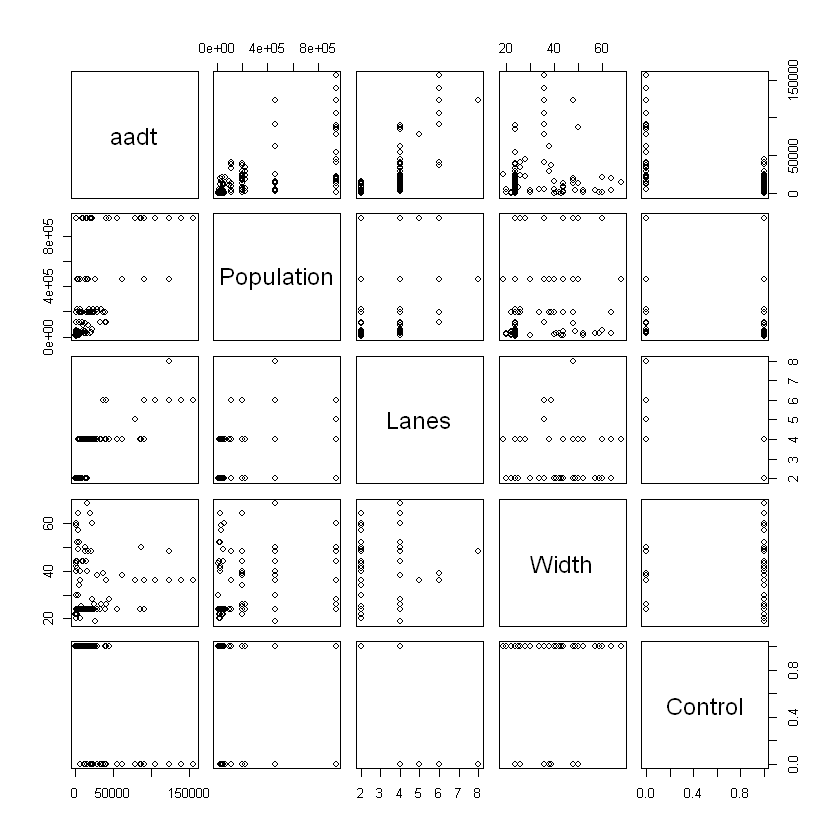

In [40]:
# Graphical representation of data
plot(aadt)

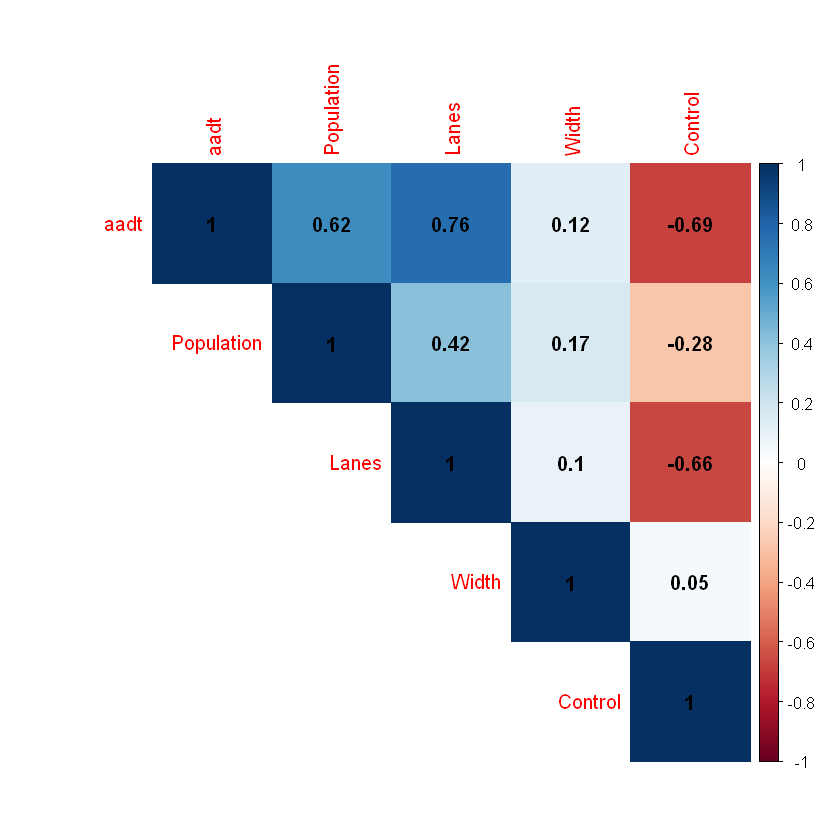

In [41]:
# Create correlation matrix
library(corrplot)
corrplot(cor(aadt), type = "upper", method = "color", addCoef.col = "black")

Based on the correlation matrix, it shows that `aadt` has a good correlation relationship with predictors `Population`, `Lanes`, and `Control`.

# 3. Regression Model Formulation

In [42]:
mlr <- lm(aadt ~ Population + Lanes + Width + Control, data = aadt)
summary(mlr)


Call:
lm(formula = aadt ~ Population + Lanes + Width + Control, data = aadt)

Residuals:
   Min     1Q Median     3Q    Max 
-36263  -8501   3493   6018  68317 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.425e+03  7.812e+03  -0.310    0.757    
Population   3.303e-02  4.708e-03   7.017 1.63e-10 ***
Lanes        9.158e+03  1.531e+03   5.983 2.49e-08 ***
Width        1.003e+02  1.243e+02   0.807    0.421    
Control     -2.361e+04  4.520e+03  -5.223 7.83e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15290 on 116 degrees of freedom
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7442 
F-statistic: 88.29 on 4 and 116 DF,  p-value: < 2.2e-16


# 4. Adequacy Checking

## 4.1 Fitted Model

We investigate the t-values, F-statistic and R-squared statistic.

* **t-tests**: We use this to determine the significance of the fitted parameters and formulate the following null hypotheses.
    + $H_0: \beta_0 = 0 $
    + $H_1: \beta_1 = 0 $
    + $H_2: \beta_2 = 0 $
    + $H_3: \beta_3 = 0 $
    + $H_4: \beta_4 = 0 $  

    Since $Pr(>|t|)$ of `Width` is greater than 0.05 at 95% significance lvel, we cannot reject $H_3$ and conclude `Width` is statistically insignificant in this model.
* **F-ratio and R-squared**:  
  The model has a R-squared value of 0.7527, which means our model explains 75.27% of the variability in the response variable. This indicates a fairly good fit as the model explains a substantial amount of variance.
  

## 4.2 Residuals

We try to obtain more information to improve the model's adequacy by investigating the residuals. Those methods include:  
* Normality checking;  
* Checking for time effects if the time order of the data is known, for non-constant variance to see whether we need take transformation on response, and for curvature of higher order than fitted in the predictors;  
* Checking for the sequential dependence of the estimated residuals.

### 4.2.1 Normality

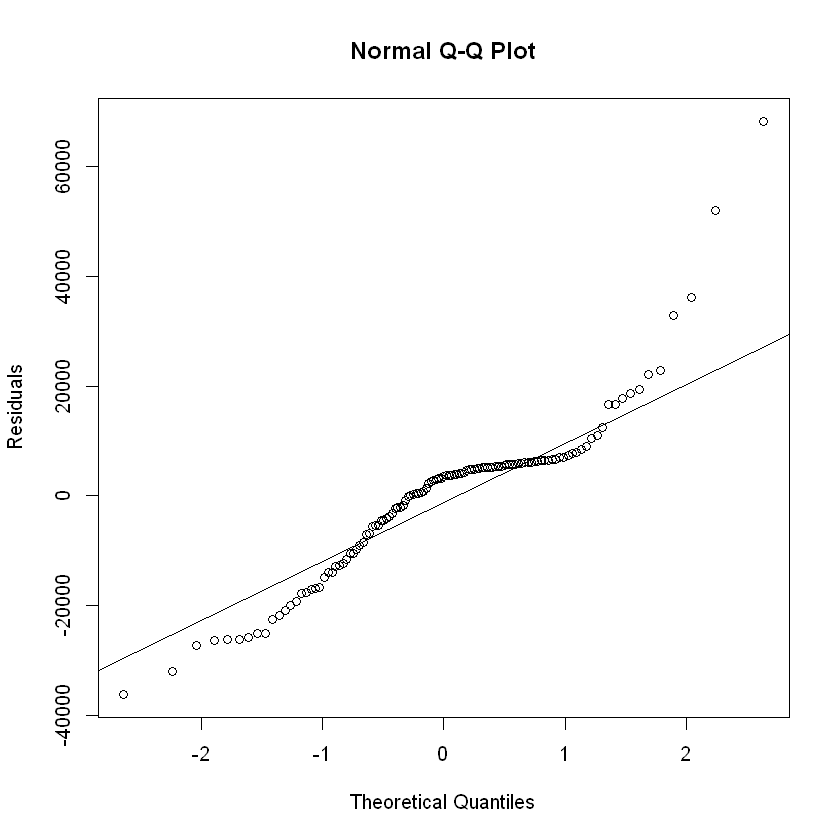

In [43]:
qqnorm(residuals(mlr), ylab = "Residuals")
qqline(residuals(mlr))

### 4.2.2 Time effects, non-constant variance and higher order curvatures
In those plots, we put the residuals $\hat{e_i}$ to the Y-axis, and then put the following variables to X-axis in turn: 
* The time order of the data, if known; 
* The fitted values $\hat{y_i}$; 
* The predictor variable $x_i$. If there are more than one predictor variables, we plot them individually.

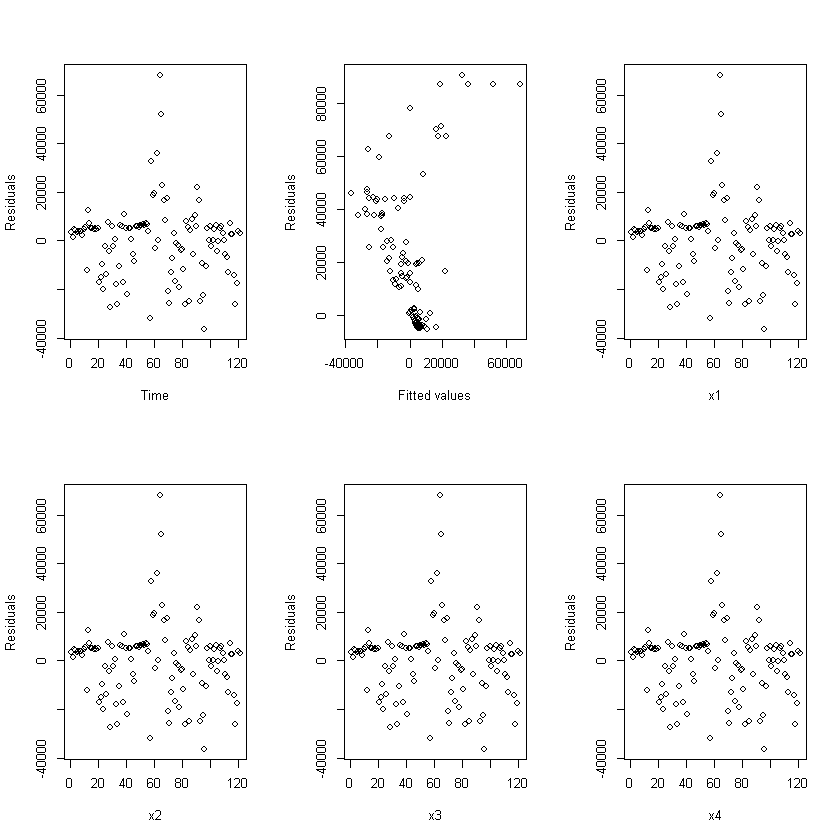

In [44]:
par(mfrow = c(2, 3))
plot(residuals(mlr), ylab = "Residuals", xlab = "Time")
plot(residuals(mlr), fitted(mlr), ylab = "Residuals", xlab = "Fitted values")
plot(residuals(mlr), aadt$x1, ylab = "Residuals", xlab = "x1")
plot(residuals(mlr), aadt$x2, ylab = "Residuals", xlab = "x2")
plot(residuals(mlr), aadt$x3, ylab = "Residuals", xlab = "x3")
plot(residuals(mlr), aadt$x4, ylab = "Residuals", xlab = "x4")

The plot of fitted values against residuals exhibit unsatisfactory residual behavior (non-constant variances). All the other plots have horizontal bands of points and hence contain no useful information in the residuals.

### 4.2.3 Sequential Dependence
Durbin-Watson test is used to check fro sequential dependence, and the test statistic is $$d = \frac{\sum^{n}_{u = 2} \left(e_u - e_{u-1}\right)^2 }{\sum_{u = 1}^{n} e^2_u}$$ and has the following properties:
* $0 \leq d \leq 4$
* The distribution of $d$ is symmetric about 2.
* If $d$ is near to 0, then successive residuals is **positively** serially correlated.
* If $d$ is near to 4, then successive residuals is **negatively** serially correlated.

In [45]:
library(lmtest)
dwtest(mlr)


	Durbin-Watson test

data:  mlr
DW = 1.3137, p-value = 3.101e-05
alternative hypothesis: true autocorrelation is greater than 0


$DW = 1.3137$ is near to 0, which implies that successive residuals are positively serially correlated.

# 5. F-test for reduced model and full model

## 5.1 Test if some coefficients are zeros

We saw that the predictor `Width` is not significant, i.e. they may equal to zero. Hence, we may want to test the following hypothesis:
$$ H_0: \beta_3 = 0 $$ 

In [46]:
# ANOVA with `Width` dropped
mlr_dropped <- lm(aadt ~ Population + Lanes + Control, data = aadt)
summary(mlr_dropped)
anova(mlr_dropped, mlr)


Call:
lm(formula = aadt ~ Population + Lanes + Control, data = aadt)

Residuals:
   Min     1Q Median     3Q    Max 
-35593  -7883   4010   5770  68441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.487e+02  7.365e+03  -0.047    0.962    
Population   3.356e-02  4.655e-03   7.211 5.93e-11 ***
Lanes        9.310e+03  1.517e+03   6.138 1.18e-08 ***
Control     -2.305e+04  4.460e+03  -5.168 9.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15270 on 117 degrees of freedom
Multiple R-squared:  0.7514,	Adjusted R-squared:  0.745 
F-statistic: 117.8 on 3 and 117 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
117,27280535046,NA,NA,NA,NA
116,27128232453,1,152302593,0.6512441,0.4213198


$p\text{-value}$ is greater than 0.05 so we cannot reject $H_0$ at 95% significance level.

## 5.2 Test for more complicated relationship

### 5.2.1 Test for interaction terms

From the correlation matrix, we see that `Lanes` and `Control` has a high correlation coefficient so we test with their interaction.

In [47]:
# Interaction term between `Population` and `Lanes`
mlr_interaction <- lm(aadt ~ Population + Lanes + Control + Width + I(Population * Lanes) + I(Lanes * Control), data = aadt)
summary(mlr_interaction)
anova(mlr_interaction, mlr)


Call:
lm(formula = aadt ~ Population + Lanes + Control + Width + I(Population * 
    Lanes) + I(Lanes * Control), data = aadt)

Residuals:
   Min     1Q Median     3Q    Max 
-33324  -3102  -1104   3368  33091 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.033e+04  1.080e+04  -1.882 0.062450 .  
Population            -3.553e-02  9.610e-03  -3.697 0.000337 ***
Lanes                  1.114e+04  2.524e+03   4.414 2.31e-05 ***
Control                2.479e+04  1.065e+04   2.327 0.021757 *  
Width                 -4.599e+01  8.621e+01  -0.533 0.594772    
I(Population * Lanes)  1.966e-02  2.590e-03   7.589 9.54e-12 ***
I(Lanes * Control)    -1.110e+04  2.478e+03  -4.480 1.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10450 on 114 degrees of freedom
Multiple R-squared:  0.8865,	Adjusted R-squared:  0.8805 
F-statistic: 148.3 on 6 and 114 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
114,12457303855,NA,NA,NA,NA
116,27128232453,-2,-14670928598,67.12873,5.42183e-20


The model is significant as the $p\text{-value}$ is much smaller than 0.05.

## 5.2 Test for more complicated relationships
We can apply transformations to the model to improve the R-squared value.  
Since the `anova()` function is limited to nested model comparisons, we will instead use 
* **Akaike Information Criterion (AIC)** - which estimates the model's ability to predict future values, and 
* **Bayesian Information Criterion (BIC)** - which balances model fit and complexity.  

A lower AIC or BIC value simply means a better fit.

### 5.2.1 Log transformation

In [48]:
# Log transformation of the response variable
mlr_log <- lm(log(aadt) ~ Population + Lanes + Width + Control, data = aadt)
summary(mlr_log)


Call:
lm(formula = log(aadt) ~ Population + Lanes + Width + Control, 
    data = aadt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31522 -0.46112  0.00963  0.59348  1.86778 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.689e+00  4.203e-01  15.914  < 2e-16 ***
Population   1.528e-06  2.533e-07   6.034 1.96e-08 ***
Lanes        6.852e-01  8.234e-02   8.321 1.93e-13 ***
Width        2.501e-03  6.686e-03   0.374   0.7091    
Control     -6.145e-01  2.432e-01  -2.527   0.0129 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8227 on 116 degrees of freedom
Multiple R-squared:  0.7411,	Adjusted R-squared:  0.7321 
F-statistic: 82.99 on 4 and 116 DF,  p-value: < 2.2e-16


### 5.2.2 Square root transformation

In [49]:
# Square root transformation of the response variable
mlr_sqrt <- lm(sqrt(aadt) ~ Population + Lanes + Width + Control, data = aadt)
summary(mlr_sqrt)


Call:
lm(formula = sqrt(aadt) ~ Population + Lanes + Width + Control, 
    data = aadt)

Residuals:
   Min     1Q Median     3Q    Max 
-97.36 -17.34  -1.46  18.59  85.66 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.472e+01  1.685e+01   1.467    0.145    
Population   9.505e-05  1.015e-05   9.361 7.47e-16 ***
Lanes        3.265e+01  3.301e+00   9.889  < 2e-16 ***
Width        1.401e-01  2.680e-01   0.523    0.602    
Control     -5.800e+01  9.750e+00  -5.949 2.93e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.98 on 116 degrees of freedom
Multiple R-squared:  0.8568,	Adjusted R-squared:  0.8519 
F-statistic: 173.5 on 4 and 116 DF,  p-value: < 2.2e-16


### 5.2.3 Inverse transformation

In [50]:
# Inverse transformation
mlr_inv <- lm(1/aadt ~ Population + Lanes + Width + Control, data = aadt)
summary(mlr_inv)


Call:
lm(formula = 1/aadt ~ Population + Lanes + Width + Control, data = aadt)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0007323 -0.0003071 -0.0001889  0.0001181  0.0041466 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.351e-03  3.286e-04   4.112 7.37e-05 ***
Population  -3.670e-10  1.980e-10  -1.853  0.06635 .  
Lanes       -2.126e-04  6.438e-05  -3.303  0.00127 ** 
Width       -5.233e-06  5.227e-06  -1.001  0.31885    
Control      2.321e-05  1.901e-04   0.122  0.90306    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0006433 on 116 degrees of freedom
Multiple R-squared:  0.2489,	Adjusted R-squared:  0.223 
F-statistic:  9.61 on 4 and 116 DF,  p-value: 9.524e-07


In [51]:
mlr4 <- lm(log(aadt) ~ log(Population) + Lanes + Control + I(log(Population) * Lanes) + I(log(Population) * Control) + I(Lanes * Control), data = aadt)
summary(mlr4)


Call:
lm(formula = log(aadt) ~ log(Population) + Lanes + Control + 
    I(log(Population) * Lanes) + I(log(Population) * Control) + 
    I(Lanes * Control), data = aadt)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3770 -0.3640  0.1085  0.4045  2.1209 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -0.47154    3.42592  -0.138  0.89077   
log(Population)               0.79555    0.27144   2.931  0.00409 **
Lanes                         1.04759    0.74700   1.402  0.16351   
Control                       0.01101    2.06469   0.005  0.99576   
I(log(Population) * Lanes)   -0.06230    0.05669  -1.099  0.27406   
I(log(Population) * Control) -0.19479    0.16317  -1.194  0.23505   
I(Lanes * Control)            0.41041    0.17308   2.371  0.01941 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7009 on 114 degrees of freedom
Multiple R-squared:  0.8153,	Adjusted R-sq

In [52]:
# Create a list for the models
models <- list(mlr, mlr_dropped, mlr_interaction, mlr_log, mlr_sqrt, mlr_inv)

# Since some of the models are not nested, we will use AIC and BIC to compare them
aic_models <- sapply(models, AIC)
bic_models <- sapply(models, BIC)

# Extract R-squared values
r_squared <- sapply(models, function(x) summary(x)$r.squared)

# Combine the results into a data frame
results <- data.frame(Model = c("Full", "Dropped Width", "Interaction", "Log", "Square Root", "Inverse"), AIC = aic_models, BIC = bic_models, R_squared = r_squared)
results

Model,AIC,BIC,R_squared
Full,2681.9772,2698.7520,0.7527409
Dropped Width,2680.6546,2694.6336,0.7513528
Interaction,2591.8068,2614.1731,0.8864585
Log,303.0458,319.8205,0.7410579
Square Root,1196.3180,1213.0928,0.8568194
Inverse,-1428.1711,-1411.3964,0.2489067


## 5.3 Model Evaluation
We first remove the `Log` and `Inverse` models since they have relatively low R-squared values and focus on the remaining models.

1. Full Model  
It is a fairly good fit but outperformed by other models.

2. Model with predictor `Width` dropped  
Trade-off in complexity for marginal improvement in AIC (has a slightly lower AIC score than `Full Model` but slightly worse fit).

3. Model with interaction terms  
Has the highest R-squared and better AIC compared to the `Full Model`.

4. `Square Root` model  
Strong fit, lower complexity penalty in BIC than `Interaction Model`, but slightly lower R-squared.

# 6. Prediction
We use the original model $$ \text{aadt} = \beta_0 + \beta_1 \text{Population} + \beta_2 \text{Lanes} + \beta_3 \text{Width} + \beta_4 \text{Control} $$ given the values for the predictors `Population`, `Lanes`, `Width`, and `Control` are 50000, 3, 60, and 0 respectively.

In [53]:
# Given population, lanes, width, and control, predict the AADT
# Population = 50000, Lanes = 3, Width = 60, Control = 0

# Create the vector
con <- c(0, 50000, 3, 60, 0)
lhat <- sum(coef(mlr) * con)
lhat

[1] 35142.78

In [54]:
t05 <- qt(0.975, df = 117)
bm <- t05 * summary(mlr)$sigma * sqrt(con %*% summary(mlr)$cov.unscaled %*% con)
conf_int <- c(lhat - bm, lhat + bm)
print(conf_int)

[1] 18909.62 51375.94


In [55]:
# Create a data frame for the predictions
con_df <- data.frame(Population = 50000, Lanes = 3, Width = 60, Control = 0)

# Predict with confidence interval
conf_pred <- predict(mlr, con_df, interval = "confidence", level = 0.95)
print(conf_pred)

      fit      lwr      upr
1 32717.3 21184.12 44250.48


In [56]:
# Predict with prediction interval
pred_interval <- predict(mlr, con_df, interval = "prediction", level = 0.95)
print(pred_interval)

      fit      lwr      upr
1 32717.3 306.8881 65127.71
